In [75]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [76]:
import pickle

with open(r"metrics_diff_models_train.pkl", "rb") as f:
    metrics_train = pickle.load(f)

def transfer_dict_to_array(metrics_dict):
    new_dict = {}
    new_dict["name"] = metrics_dict["name"]
    new_dict["path"] = metrics_dict["path"]
    for k,v in metrics_dict["metrics"][0].items():
        new_dict[k] = [m[k] for m in metrics_dict["metrics"]]
    return new_dict

metrics_train_new = [transfer_dict_to_array(i) for i in metrics_train]
metrics_train

[{'name': 'StreamingCNNTiny',
  'path': './AudioClassifierCNNNoReluTiny_16K_3s_raw_signal/model.51.0.9442029595375061.pth',
  'metrics': [{'TP': 3806,
    'TN': 19,
    'FP': 7467,
    'FN': 0,
    'Accuracy': 0.3387353878852285,
    'Recall': 1.0,
    'Precision': 0.33762086401135455,
    'TPR': 1.0,
    'FPR': 0.9974619289340102,
    'F1': 0.5048080111413223,
    'F2': 0.7181945125863306,
    't': 0.0},
   {'TP': 3804,
    'TN': 5233,
    'FP': 2253,
    'FN': 2,
    'Accuracy': 0.8003010981225647,
    'Recall': 0.999474513925381,
    'Precision': 0.6280336800396236,
    'TPR': 0.999474513925381,
    'FPR': 0.30096179535132245,
    'F1': 0.7713677380107471,
    'F2': 0.8937549927165076,
    't': 0.01},
   {'TP': 3802,
    'TN': 5531,
    'FP': 1955,
    'FN': 4,
    'Accuracy': 0.8265143464399575,
    'Recall': 0.998949027850762,
    'Precision': 0.6604134097620288,
    'TPR': 0.998949027850762,
    'FPR': 0.26115415442158696,
    'F1': 0.7951479661194186,
    'F2': 0.906057861875029

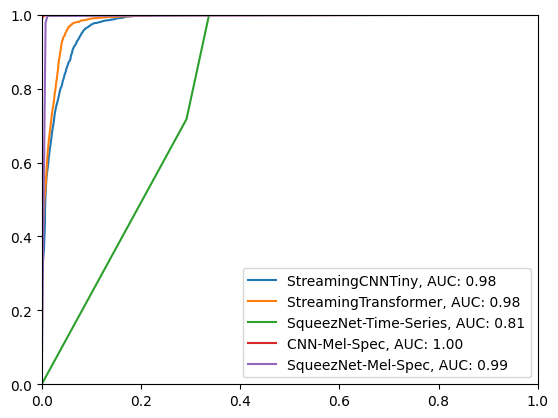

In [120]:
import matplotlib.pyplot as plt
from sklearn import metrics

for m in metrics_train_new:
    tpr = [*m["TPR"] ,0.0]
    fpr = [*m["FPR"] ,0.0]
    plt.plot(fpr,tpr,  label=m["name"] + ", " + 'AUC: {0:.2f}'.format(metrics.auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 1.0)
fig_roc = plt.gcf()
plt.show()
fig_roc.savefig("roc_train.pdf", bbox_inches='tight')

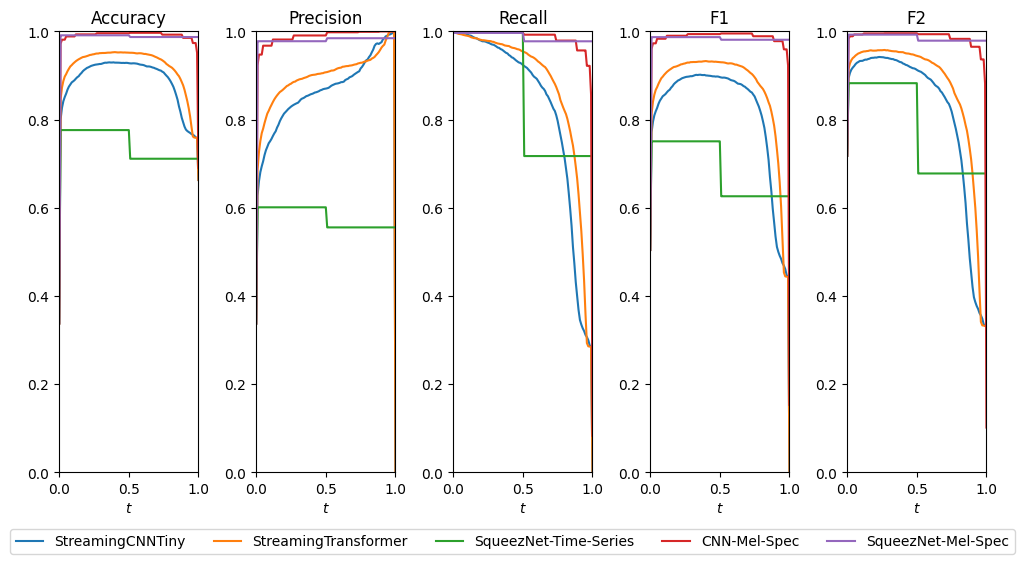

In [159]:
m_name = ["Accuracy", "Precision", "Recall", "F1", "F2"]
fig, axes = plt.subplots(1, len(m_name), figsize=(10, 5))
fig.tight_layout()
idx = 0
for name in m_name:
    for m in metrics_train_new:
        axes[idx].plot(m["t"], m[name],  label=m["name"])
#     axes[idx].legend(loc="lower right")
    axes[idx].set_ylim(0.0, 1.0)
    axes[idx].set_xlim(0.0, 1.0)
    axes[idx].set_title(name)
    axes[idx].set_xlabel("$t$")
#     axes[idx].show()
    idx += 1
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc = "lower center", ncol=5, bbox_to_anchor=[0.5, -0.1])
fig.show()
fig.savefig("various_metrics_on_different_th_train.pdf", bbox_inches='tight')

In [121]:
with open(r"metrics_diff_models_test.pkl", "rb") as f:
    metrics_test = pickle.load(f)

metrics_test_new = [transfer_dict_to_array(i) for i in metrics_test]


In [122]:
import pandas as pd

In [152]:
met_df = pd.DataFrame.from_dict(metrics_train_new[0])
opt_f2_df = pd.DataFrame(columns = met_df.columns)

idx = 0

for m in metrics_train_new:
    met_df = pd.DataFrame.from_dict(m)
    opt_f2_df.loc[idx] = met_df.loc[met_df['F2'].idxmax()]
    idx += 1

In [153]:
print(opt_f2_df[["name", "t", "Accuracy", "Precision", "Recall", "F2"]].style.format(precision=2).to_latex())

opt_f2_df.iloc[0]["t"]

\begin{tabular}{lllllll}
 & name & t & Accuracy & Precision & Recall & F2 \\
0 & StreamingCNNTiny & 0.23 & 0.92 & 0.82 & 0.98 & 0.94 \\
1 & StreamingTransformer & 0.27 & 0.95 & 0.89 & 0.98 & 0.96 \\
2 & SqueezNet-Time-Series & 0.01 & 0.78 & 0.60 & 1.00 & 0.88 \\
3 & CNN-Mel-Spec & 0.27 & 1.00 & 0.99 & 1.00 & 1.00 \\
4 & SqueezNet-Mel-Spec & 0.01 & 0.99 & 0.98 & 1.00 & 0.99 \\
\end{tabular}



0.23

In [154]:
met_df_test = pd.DataFrame(columns = met_df.columns)
idx = 0

for m in metrics_test_new:
    df = pd.DataFrame.from_dict(m)
    t = opt_f2_df.iloc[idx]["t"]
    loc = df.index[df['t'] == t][0]
    
    met_df_test.loc[idx] = df.iloc[loc]
    idx += 1

In [156]:
print(met_df_test[["name", "t", "Accuracy", "Precision", "Recall", "F2"]].style.format(precision=2).to_latex())


\begin{tabular}{lllllll}
 & name & t & Accuracy & Precision & Recall & F2 \\
0 & StreamingCNNTiny & 0.23 & 0.94 & 0.86 & 0.98 & 0.95 \\
1 & StreamingTransformer & 0.27 & 0.93 & 0.90 & 0.91 & 0.91 \\
2 & SqueezNet-Time-Series & 0.01 & 0.79 & 0.61 & 1.00 & 0.88 \\
3 & CNN-Mel-Spec & 0.27 & 0.99 & 0.98 & 0.99 & 0.99 \\
4 & SqueezNet-Mel-Spec & 0.01 & 0.99 & 0.96 & 1.00 & 0.99 \\
\end{tabular}

